### Credit Card Lead Prediction
* Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



* The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



* In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
# Loading train dataset
credit_train = pd.read_csv('C:/Users/rayad/Downloads/train_s3TEQDk.csv')

In [3]:
### Removing ID column from Dataframe
credit_train = credit_train.iloc[:, 1:]

In [4]:
credit_train.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [5]:
print(credit_train.select_dtypes(include=['object']).columns)

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')


In [6]:
# Info about train data
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [7]:
### Descriptive Statistics
credit_train.describe()

Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean       43.856307      46.959141         1.128403e+06       0.237208
std        14.828672      32.353136         8.529364e+05       0.425372
min        23.000000       7.000000         2.079000e+04       0.000000
25%        30.000000      20.000000         6.043100e+05       0.000000
50%        43.000000      32.000000         8.946010e+05       0.000000
75%        54.000000      73.000000         1.366666e+06       0.000000
max        85.000000     135.000000         1.035201e+07       1.000000

In [8]:
# Loading Test dataset
test = pd.read_csv('C:/Users/rayad/Downloads/test_mSzZ8RL.csv')

In [9]:
# Removing ID column from Test dataset
credit_test = test.iloc[:, 1:]

In [10]:
# Info about test data
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       92790 non-null   object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.2+ MB


In [11]:
print("Length of Train Data: ", len(credit_train))
print('Length of Test Data: ', len(credit_test))

Length of Train Data:  245725
Length of Test Data:  105312


In [12]:
# Finding Missing values from train data
missing_val_train = credit_train.isna().sum() * 100/len(credit_train)
missing_val_train

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

#### Credit_Product Variable is having around 12% of missing values

In [13]:
# Replacing missing values with mode value
credit_train['Credit_Product'] = credit_train['Credit_Product'].fillna(credit_train['Credit_Product'].mode()[0])

In [14]:
# Finding missing values from test data
missing_val_test = credit_test.isna().sum() * 100/len(credit_test)
missing_val_test

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [15]:
# Replacing missing values with mode value
credit_test['Credit_Product'] = credit_test['Credit_Product'].fillna(credit_test['Credit_Product'].mode()[0])

In [16]:
# Function to find unique values of Object datatype variables
def print_unique_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [17]:
# Unique values for Object columns in train dataset
print_unique_values(credit_train)

Gender : ['Female' 'Male']
Region_Code : ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation : ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code : ['X3' 'X1' 'X2' 'X4']
Credit_Product : ['No' 'Yes']
Is_Active : ['No' 'Yes']


In [18]:
# Unique values for Object columns in test dataset
print_unique_values(credit_test)

Gender : ['Male' 'Female']
Region_Code : ['RG254' 'RG268' 'RG270' 'RG272' 'RG253' 'RG257' 'RG284' 'RG283' 'RG277'
 'RG273' 'RG261' 'RG280' 'RG274' 'RG278' 'RG269' 'RG281' 'RG251' 'RG252'
 'RG279' 'RG282' 'RG262' 'RG263' 'RG264' 'RG256' 'RG265' 'RG260' 'RG258'
 'RG271' 'RG250' 'RG275' 'RG276' 'RG267' 'RG255' 'RG259' 'RG266']
Occupation : ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code : ['X1' 'X2' 'X3' 'X4']
Credit_Product : ['Yes' 'No']
Is_Active : ['No' 'Yes']


In [19]:
credit_train.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [20]:
credit_train.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [21]:
credit_train.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [22]:
credit_train.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [23]:
credit_train.Credit_Product.value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

In [24]:
credit_train.Is_Active.value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [25]:
credit_train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

### Visualizations

<AxesSubplot:xlabel='Gender', ylabel='count'>

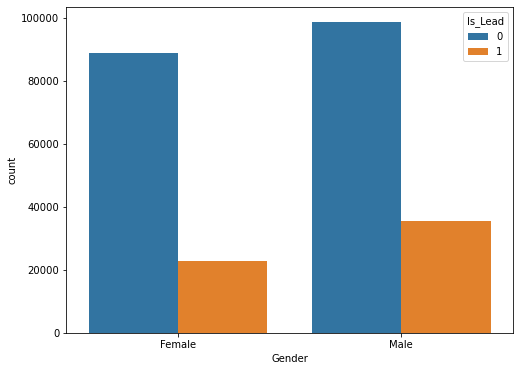

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Is_Lead', data=credit_train)

#### Gender Wise Non-Conversion Vs Conversion
* By the above plot we can infer, there are more male customers compared to female customers.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

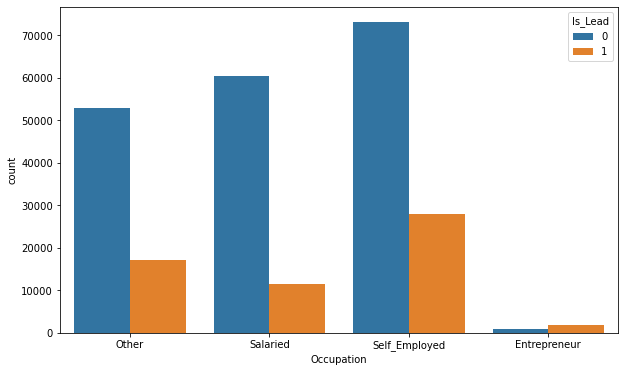

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Is_Lead', data=credit_train)

#### Occupation wise Non-conversion Vs Conversion
* By the above plot we can infer that the majority of customers are of self-employed.
* There is high chance of lead for Enterpreneur

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Channel_Code', hue='Is_Lead', data=credit_train)

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

#### Channel_code wise Non-Conversion Vs Conversion
* X3 Channel is having better chance lead compared all other channels

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

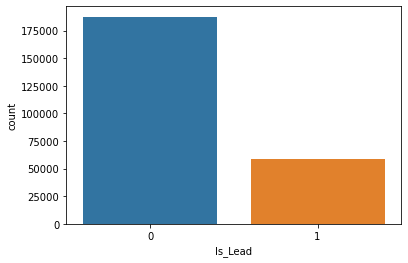

In [29]:
sns.countplot(x='Is_Lead', data=credit_train)

#### As we can see that there is huge difference between both the classes, we can clearly infer that the dataset is highly imbalanced

### Boxplot to visualize outliers

In [30]:
plt.boxplot(credit_train['Age'])
plt.title("BoxPlot for Age")

Text(0.5, 1.0, 'BoxPlot for Age')

Text(0.5, 1.0, 'Boxplot for Vintage')

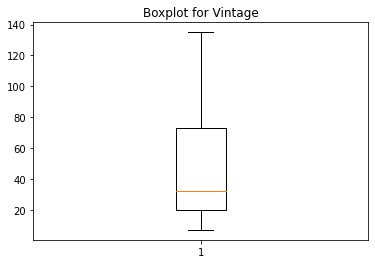

In [31]:
plt.boxplot(credit_train['Vintage'])
plt.title("Boxplot for Vintage")

### Encoding Categorical Variables
* Using One-Hot encoding for Gender, Channel_Code, Credit_Product, Is_Active as the maximum categories of these variables are 4
* Using Label-Encoder for Region_code variable as it contains 35 categories.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

#### Encoding Train Data

In [34]:
credit_train['Region_Code'] = le.fit_transform(credit_train['Region_Code'])

In [35]:
credit_train = pd.get_dummies(credit_train)

In [36]:
credit_train.head()

Age  Region_Code  Vintage  Avg_Account_Balance  Is_Lead  Gender_Female  \
0   73           18       43              1045696        0              1   
1   30           27       32               581988        0              1   
2   56           18       26              1484315        0              1   
3   34           20       19               470454        0              0   
4   30           32       33               886787        0              1   

   Gender_Male  Occupation_Entrepreneur  Occupation_Other  \
0            0                        0                 1   
1            0                        0                 0   
2            0                        0                 0   
3            1                        0                 0   
4            0                        0                 0   

   Occupation_Salaried  Occupation_Self_Employed  Channel_Code_X1  \
0                    0                         0                0   
1                    1                         0                1   
2                    0                         1                0   
3                    1                         0                1   
4                    1                         0                1   

   Channel_Code_X2  Channel_Code_X3  Channel_Code_X4  Credit_Product_No  \
0                0                1                0                  1   
1                0                0                0                  1   
2                0                1                0                  1   
3                0                0                0                  1   
4                0                0                0                  1   

   Credit_Product_Yes  Is_Active_No  Is_Active_Yes  
0                   0             1              0  
1                   0             1              0  
2                   0             0              1  
3                   0             1              0  
4                   0             1              0

In [37]:
credit_train.columns.shape

(19,)

#### Encoding Test data

In [38]:
credit_test['Region_Code'] = le.fit_transform(credit_test['Region_Code'])

In [39]:
credit_test = pd.get_dummies(credit_test)

In [40]:
credit_test.head()

Age  Region_Code  Vintage  Avg_Account_Balance  Gender_Female  Gender_Male  \
0   29            4       25               742366              0            1   
1   43           18       49               925537              0            1   
2   31           20       14               215949              0            1   
3   29           22       33               868070              0            1   
4   29           20       19               657087              1            0   

   Occupation_Entrepreneur  Occupation_Other  Occupation_Salaried  \
0                        0                 1                    0   
1                        0                 1                    0   
2                        0                 0                    1   
3                        0                 1                    0   
4                        0                 1                    0   

   Occupation_Self_Employed  Channel_Code_X1  Channel_Code_X2  \
0                         0                1                0   
1                         0                0                1   
2                         0                1                0   
3                         0                1                0   
4                         0                1                0   

   Channel_Code_X3  Channel_Code_X4  Credit_Product_No  Credit_Product_Yes  \
0                0                0                  0                   1   
1                0                0                  1                   0   
2                0                0                  1                   0   
3                0                0                  1                   0   
4                0                0                  1                   0   

   Is_Active_No  Is_Active_Yes  
0             1              0  
1             1              0  
2             1              0  
3             1              0  
4             1              0

### Balancing the data through SMOTE Technique

In [41]:
### Dividing X and Y variables
X = credit_train.drop(columns='Is_Lead', axis=1)
Y = credit_train['Is_Lead']

In [42]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X, Y)

In [43]:
Y_sm.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

# Model Building

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.2, random_state=12, stratify=Y_sm)

In [46]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    149950
1    149949
Name: Is_Lead, dtype: int64
1    37488
0    37487
Name: Is_Lead, dtype: int64


In [47]:
model_lr = LogisticRegression()

In [48]:
model_lr.fit(X_train, Y_train)

LogisticRegression()

#### Predictions on Test Data

In [49]:
model_lr_pred_test = model_lr.predict(X_test)

#### ROC Curve for Logistic Regression

In [50]:
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:, 1])
auc_lr_test = roc_auc_score(Y_test, model_lr_pred_test)

plt.plot(fpr, tpr, color = 'blue', label = "Logistic Regression (area = 0.2f)"%auc_lr_test)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Logistic Regression Model")
plt.show()

#### Test Accuracy

In [51]:
auc_lr_test*100

50.0

#### Predictions on Train data

In [52]:
model_lr_pred_train = model_lr.predict(X_train)

#### Train Accuracy

In [53]:
auc_lr_train = roc_auc_score(Y_train, model_lr_pred_train)
auc_lr_train*100

50.0

In [54]:
print(classification_report(Y_test, model_lr_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     37487
           1       0.50      1.00      0.67     37488

    accuracy                           0.50     74975
   macro avg       0.25      0.50      0.33     74975
weighted avg       0.25      0.50      0.33     74975



## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [57]:
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Predictions on Test data

In [58]:
model_dt_pred_test = model_dt.predict(X_test)

#### ROC Curve for Decision Tree Model

In [59]:
fpr, tpr, thresholds = roc_curve(Y_test, model_dt.predict_proba(X_test)[:, 1])
model_dt_auc_test = roc_auc_score(Y_test, model_dt_pred_test)

plt.plot(fpr, tpr, color = 'blue', label = "Logistic Regression (area = 0.2f)"%model_dt_auc_test)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Decision Tree Model")
plt.show()

#### Train Accuracy

In [60]:
model_dt_auc_test*100

78.9570317155103

#### Predictions on Train data

In [61]:
model_dt_pred_train = model_dt.predict(X_train)

#### Train Accuracy

In [62]:
model_dt_auc_train = roc_auc_score(Y_train, model_dt_pred_train)
model_dt_auc_train*100

78.94056480926311

In [63]:
print(classification_report(Y_test, model_dt_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80     37487
           1       0.81      0.76      0.78     37488

    accuracy                           0.79     74975
   macro avg       0.79      0.79      0.79     74975
weighted avg       0.79      0.79      0.79     74975



#### Preparing Submission Data

In [64]:
# Predictions on unseen data
pred_dt_sub = pd.DataFrame(model_dt.predict(credit_test))
pred_dt_sub.columns = ['Is_Lead']

In [65]:
sub_id = test['ID']

In [66]:
pred_dt_df = pd.concat([sub_id, pred_dt_sub], axis=1)

In [67]:
pred_dt_df.to_csv('DecisionTree_Predictions.csv', index=False)

#### Important Features

In [68]:
fn = X_train.columns

In [69]:
imp_feature = pd.Series(model_dt.feature_importances_, index=fn).sort_values(ascending=False)

In [70]:
# Creating a bar plot for important features
plt.figure(figsize=(10,6))
imp = sns.barplot(x=imp_feature, y=imp_feature.index)
imp.set(xlabel= "Feature_Score", ylabel="Feature_Name")

[Text(0.5, 0, 'Feature_Score'), Text(0, 0.5, 'Feature_Name')]

## Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier()

In [73]:
model_rfc = rfc.fit(X_train, Y_train)

#### Predictions on test data

In [74]:
model_rfc_pred_test = model_rfc.predict(X_test)

#### ROC Curve for Random Forest model

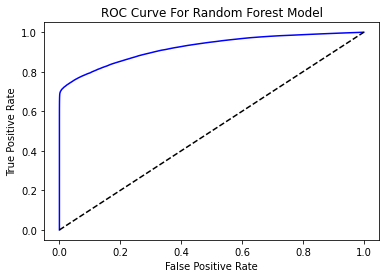

In [75]:
fpr, tpr, thresholds = roc_curve(Y_test, model_rfc.predict_proba(X_test)[:, 1])
auc_rf_test = roc_auc_score(Y_test, model_rfc_pred_test)

plt.plot(fpr, tpr, color = 'blue', label = "Logistic Regression (area = 0.2f)"%auc_rf_test)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Random Forest Model")
plt.show()

#### Test Accuracy

In [76]:
auc_rf_test*100

84.95506782086505

#### Predictions on train data

In [77]:
model_rfc_pred_train = model_rfc.predict(X_train)

#### Train Accuracy

In [78]:
auc_rf_train = roc_auc_score(Y_train, model_rfc_pred_train)
auc_rf_train*100

99.9946648527166

In [79]:
print(classification_report(Y_test, model_rfc_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     37487
           1       0.90      0.79      0.84     37488

    accuracy                           0.85     74975
   macro avg       0.86      0.85      0.85     74975
weighted avg       0.86      0.85      0.85     74975



#### Preparing Submission data

In [80]:
# Predictions on unseen data
test_pred_rfc = model_rfc.predict(credit_test)

In [81]:
test_pred_df = pd.DataFrame(test_pred_rfc)
test_pred_df.columns = ['Is_Lead']

In [82]:
sub_rfc = pd.concat([sub_id, test_pred_df], axis=1)

In [83]:
sub_rfc.to_csv("Random_Forest_Predictions.csv", index=False)

## XGBM Model

In [84]:
from xgboost import XGBClassifier

In [85]:
xgb = XGBClassifier(n_estimators = 200)

In [86]:
model_xgb = xgb.fit(X_train, Y_train)

[15:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [87]:
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Predictions on test data

In [88]:
model_xgb_pred_test = model_xgb.predict(X_test)
xgb_predictions_test = [round(value) for value in model_xgb_pred_test]

#### ROC Curve for XGBM Model

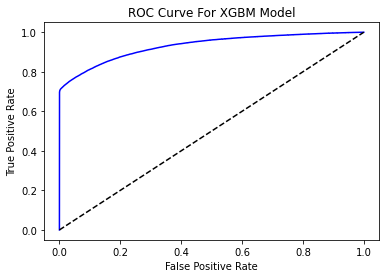

In [89]:
fpr, tpr, thresholds = roc_curve(Y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_test_xgb = roc_auc_score(Y_test, xgb_predictions_test)

plt.plot(fpr, tpr, color = 'blue', label = "Logistic Regression (area = 0.2f)"%auc_test_xgb)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For XGBM Model")
plt.show()


#### Test Accuracy

In [90]:
auc_test_xgb*100

85.89807612178795

#### Predictions on train data

In [91]:
model_xgb_pred_train = model_xgb.predict(X_train)
xgb_predictions_train = [round(value) for value in model_xgb_pred_train]

#### Train Accuracy

In [92]:
auc_train_xgb = roc_auc_score(Y_train, xgb_predictions_train)
auc_train_xgb*100

87.51010122812659

In [93]:
print(classification_report(Y_test, xgb_predictions_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     37487
           1       0.93      0.78      0.85     37488

    accuracy                           0.86     74975
   macro avg       0.87      0.86      0.86     74975
weighted avg       0.87      0.86      0.86     74975



#### Preparing Submission data

In [94]:
# Predictions on unseen data
pred_xgb = pd.DataFrame(model_xgb.predict(credit_test))
pred_xgb.columns = ['Is_Lead']

In [95]:
xgb_pred = pd.concat([sub_id, pred_xgb], axis=1)

In [96]:
xgb_pred.to_csv("XGBM_Predicitions.csv", index=False)

## LGBM Model

In [97]:
import lightgbm as lgb

In [98]:
lgb_data = lgb.Dataset(X_train, label=Y_train)

In [99]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [100]:
model_lgb = lgb.train(params, lgb_data, 2000)

[LightGBM] [Info] Number of positive: 149949, number of negative: 149950
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 299899, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000007
[LightGBM] [Info] Start training from score -0.000007


#### Predictions on test data

In [101]:
model_lgb_pred_test = model_lgb.predict(X_test)
model_lgb_pred_test = [round(value) for value in model_lgb_pred_test]

#### Test Accuracy

In [102]:
model_lgb_auc_test = roc_auc_score(Y_test, model_lgb_pred_test)
model_lgb_auc_test * 100

85.19785343767657

#### Predictions on train data

In [103]:
model_lgb_pred_train = model_lgb.predict(X_train)

#### Train Accuracy

In [104]:
model_lgb_auc_train = roc_auc_score(Y_train, model_lgb_pred_train )
model_lgb_auc_train*100

92.56305851558719

#### Classification report

In [105]:
print(classification_report(Y_test, model_lgb_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     37487
           1       0.93      0.76      0.84     37488

    accuracy                           0.85     74975
   macro avg       0.86      0.85      0.85     74975
weighted avg       0.86      0.85      0.85     74975



#### Preparing submission data

In [106]:
# Predictions on unseen data
model_lgb_df = pd.DataFrame(model_lgb.predict(credit_test))
model_lgb_df.columns = ['Is_Lead']

In [107]:
model_lgb_sub = pd.concat([sub_id, model_lgb_df], axis=1)

In [108]:
model_lgb_sub.to_csv('LGBM_Predictions.csv', index=False)

## AdaBoost Model

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
model_adb = AdaBoostClassifier(n_estimators=200)

In [111]:
model_adb.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=200)

#### Predictions on test data

In [112]:
model_adb_pred_test = model_adb.predict(X_test)
model_adb_pred_test = [round(value) for value in model_adb_pred_test]

#### Test Accuracy

In [113]:
model_adb_auc_test = roc_auc_score(Y_test, model_adb_pred_test)
model_adb_auc_test*100

84.94976426797368

#### Predictions on train data

In [114]:
model_adb_pred_train = model_adb.predict(X_train)
model_adb_pred_train = [round(value) for value in model_adb_pred_train]

#### Train Accuracy

In [115]:
model_adb_auc_train = roc_auc_score(Y_train, model_adb_pred_train)
model_adb_auc_train*100

85.05894128711998

#### Classification report

In [116]:
print(classification_report(Y_test, model_adb_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     37487
           1       0.92      0.76      0.84     37488

    accuracy                           0.85     74975
   macro avg       0.86      0.85      0.85     74975
weighted avg       0.86      0.85      0.85     74975



#### Preparing submission data

In [117]:
# Predictions on unseen data
model_adb_df = pd.DataFrame(model_adb.predict(credit_test))
model_adb_df.columns = ['Is_Lead']

In [118]:
model_adb_sub = pd.concat([sub_id, model_adb_df], axis=1)

In [119]:
model_adb_sub.to_csv('Adaboost_Predictions.csv', index=False)

#### Creating DataFrame to compare train and test accuracy of all models

In [120]:
model_scores = {'Model': ['Logistic_Regression', 'Decision_Tree', 'Random_Forest', 'XGBM', 'LGBM', 'AdaBoost'], 
                'Train_Accuracy': [auc_lr_train, model_dt_auc_train, auc_rf_train, auc_train_xgb, model_lgb_auc_train, model_adb_auc_train],
               'Test_Accuracy': [auc_lr_test, model_dt_auc_test, auc_rf_test, auc_test_xgb, model_lgb_auc_test, model_adb_auc_test]}

In [121]:
model_scores_df = pd.DataFrame(model_scores)


In [122]:
model_scores_df.sort_values('Test_Accuracy', ascending=False)

Model  Train_Accuracy  Test_Accuracy
3                 XGBM        0.875101       0.858981
4                 LGBM        0.925631       0.851979
2        Random_Forest        0.999947       0.849551
5             AdaBoost        0.850589       0.849498
1        Decision_Tree        0.789406       0.789570
0  Logistic_Regression        0.500000       0.500000